In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date


('2017-08-23',)

2017-08-23
2016-08-23


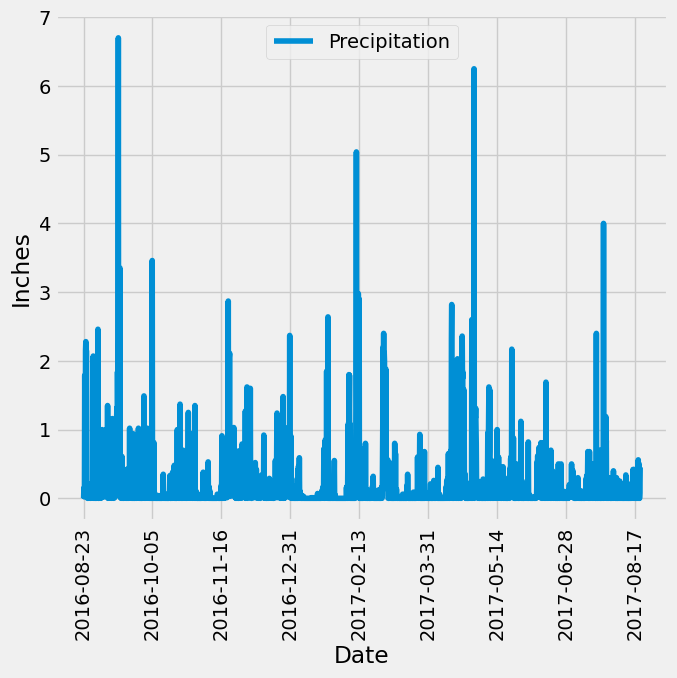

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_point = dt.date(2017, 8, 23)
print(recent_point)

# Calculate the date one year from the last date in data set.
one_year_recent = recent_point - dt.timedelta(days = 365)
print(one_year_recent)

# Perform a query to retrieve the data and precipitation scores
one_year_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_recent, measurement.prcp != None).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_prcp = pd.DataFrame(one_year_prcp, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
df_prcp.set_index("Date", inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
df_prcp.plot(figsize=(7,7))
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.ylabel("Inches")
plt.tight_layout()
plt.savefig('Precipitation.png')


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).all()
print(total_stations)

[(9,)]


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sum_temp_stations = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
sum_temp_stations

[(54.0, 85.0, 71.66378066378067)]

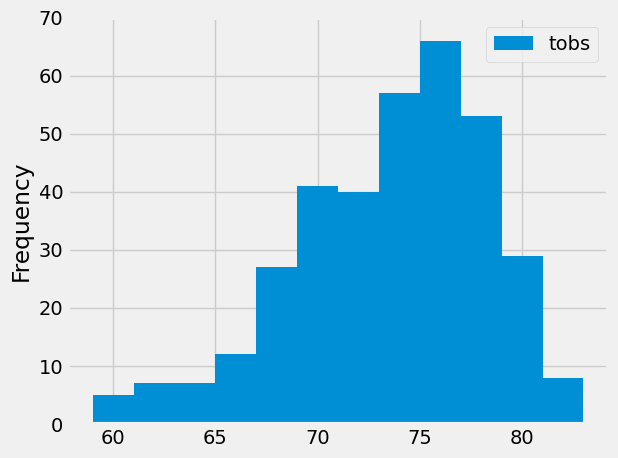

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year_recent).all()
active_year_df = pd.DataFrame(active_year, columns = ['tobs'])

active_year_df.plot.hist(bins=12)
plt.ylim(0,70)
plt.tight_layout()
plt.savefig('Active_Station_Hist.png')

# Close Session

In [16]:
# Close Session
session.close()